In [10]:
import numpy as np
import matplotlib.pyplot as plt

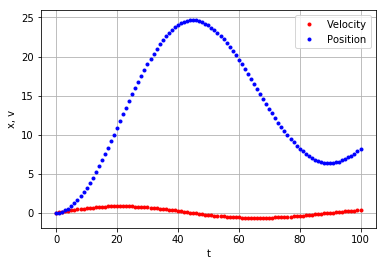

In [32]:
t, v = np.loadtxt('./files/cpresources/velocities.txt', unpack=True)

N = len(t)

x = np.empty(N)
x[0] = 0

    
for k in range(1,N):
    x[k] = x[k-1] + (v[k-1] + v[k])/2

plt.figure(1)
plt.plot(t,v,'r.',label='Velocity')
plt.plot(t,x,'b.',label='Position')
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('x, v')
plt.grid()
plt.show()

In [31]:
def f(x):
    return x**4 - 2*x + 1

N = 10000
a = 0.0
b = 2.0
h = (b-a)/N

s = f(a) + f(b) + 4*f(b-h)
for k in range(1,int(N/2)):
    s += 4*f(a + (2*k-1)*h) + 2*f(a+2*k*h)

#from math import abs
r = abs(h/3*s-4.4)/4.4

print('Value of the integral {} with releative error {}'.format(int(h/3*s),r))

Value of the integral 4 with releative error 4.037174635000569e-16


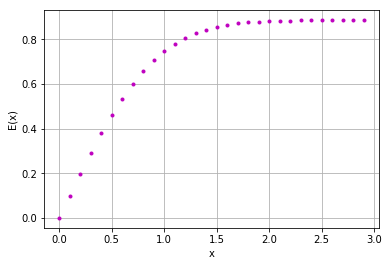

In [49]:
x = np.arange(0,3,0.1)

def simpson(f, a, b, n):
    """Approximates the definite integral of f from a to b by the
    composite Simpson's rule, using n subintervals (with n even)"""

    if n % 2:
        raise ValueError("n must be even (received n=%d)" % n)

    h = (b - a) / n
    s = f(a) + f(b)

    for i in range(1, n, 2):
        s += 4 * f(a + i * h)
    for i in range(2, n-1, 2):
        s += 2 * f(a + i * h)

    return s * h / 3

ex = simpson(lambda t:np.exp(-t**2), 0.0, x, 100000)

plt.figure(1)
plt.plot(x,ex,'m.')
plt.xlabel('x')
plt.ylabel('E(x)')
plt.grid()
plt.show()

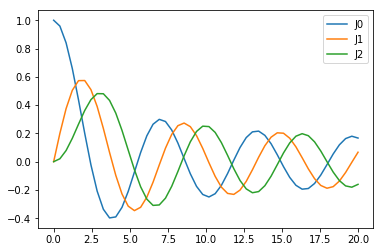

In [55]:
from numpy import cos,sin,pi
from pylab import *

def J(m,x):	
	
	def f(teta):
	    return cos(m*teta - x*sin(teta))
	
	N = 1000
	a = 0.
	b = pi
	h = (b-a)/N
	
	s = f(a) + f(b) + 4*f(b-h)
	for k in range(1,N//2):
	    s += 4*f(a + (2*k-1)*h) + 2*f(a+2*k*h)
	
	I = h/3*s/pi
	
	return I

x = linspace(0,20)

plot(x,J(0,x),label='J0')
plot(x,J(1,x),label='J1')
plot(x,J(2,x),label='J2')
legend()
show()

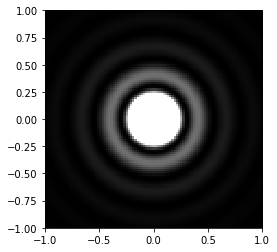

In [64]:
lambda1 = 0.5
k = 2*np.pi/lambda1

x,y = np.mgrid[-1:1:100j,-1:1:100j]
r = np.sqrt(x**2 + y**2)

I = (J(1,k*r)/(k*r))**2

plt.figure(1)
plt.imshow(I,vmax=0.1/10,extent=(-1,1,-1,1))
plt.show()

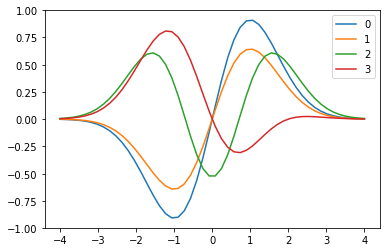

In [73]:
from math import factorial
from numpy import linspace,exp,sqrt,pi
from pylab import *


def H(n,x):
	H = [1,2*x]
	
	for ni in range(n):
		H.append(2*x*H[ni] - 2*ni*H[ni-1])
	
	return H[-1]

def ksi(n,x):
	
	return 1/sqrt(2**n*factorial(n)*sqrt(pi)) * exp(-x**2/2) * H(n,x)

	
x = linspace(-4,4)
n = [0,1,2,3]

for ni in n:
	plot(x,ksi(ni,x),label=ni)

legend()
show()
